In [ ]:
# 합성공 층의 가중치와 특성맵을 시각화하여
# 이미지에서 신경망이 어떤 것을 학습하는지 알아보자

# 절편은 시각적으로 의미가 없음 (시각화하지않음)
# 예로 둥근 특징을 두드러지게 표현하는 필터가 있다면...

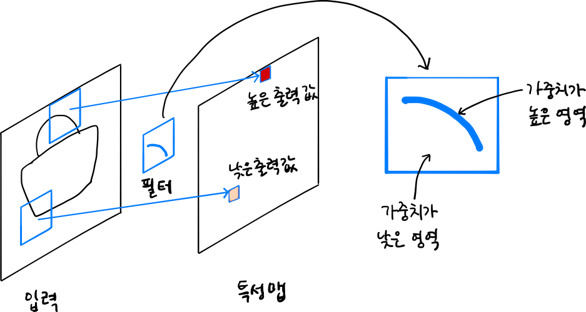

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.keras.utils.set_random_seed(42)
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.keras 파일을 다운로드받아 사용
# !wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.keras

In [4]:
# 08-01.합성곱신경망 에서 저장해두었던 파일을 사용
model = keras.models.load_model('best-cnn-model.keras') # 모델에 케라스 값을 불러옴
# model.layers
# model.layers 리스트에 전에 만들었던 Conv2D, MaxPoolgin2D 층이 번갈아 가면서 연속으로 나옴
# Flatten층 -> Dense층 -> Dropout층 -> 마지막 층에 Dense 출력층도 보임
model.summary()
# keras.utils.plot_model(model, show_shapes=True) # 입력과 출력 크기를 표시

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

In [6]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [15]:
#conv.weights[0]

In [12]:
conv_weights = conv.weights[0].numpy()

In [16]:
print(conv_weights.mean(), conv_weights.std()) # 0, 0.22  (dropout의 랜덤성으로 인해 값이 살짝 다를 수 있음)

-0.009400838 0.22008723


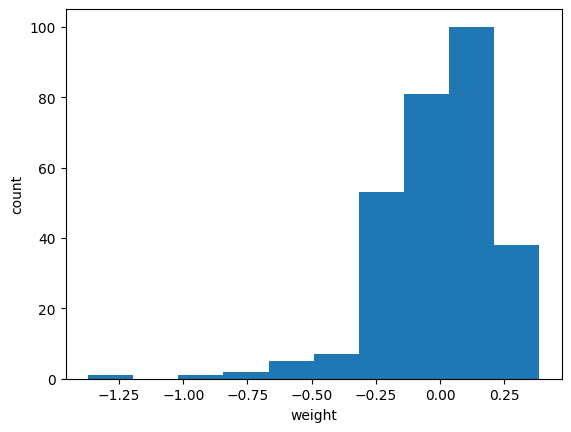

In [17]:
import matplotlib.pyplot as plt

# 이 가중치가 어떤 분포를 가졌는지 직관적으로 이해 해보자.
# hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달 해야 함
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 0을 중심으로 분포도를 확인 할 수 있음

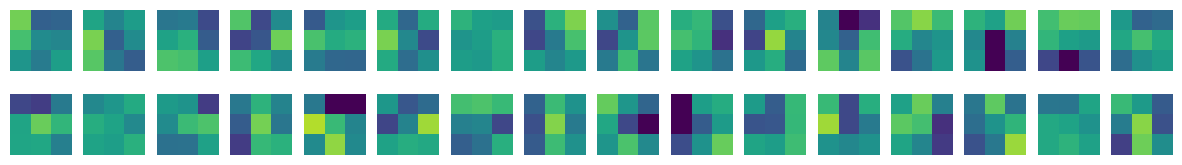

In [19]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))

for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0, 16*i+j], vmin=-0.5, vmax=0.5)
        axs[i,j].axis('off')

plt.show()

In [20]:
# 이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어 보겠다.
# 이 합성곱 층의 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 그림으로 비교할 것이다.
no_training_model = keras.Sequential() # Sequential 클래스 모델을 만듬

no_training_model.add(keras.layers.Conv2D(
    32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# Conv2D 층 하나를 추가

no_training_conv = no_training_model.layers[0]
# no_training_conv 변수에 Conv2D층의 가중치를 저장

print(no_training_conv.weights[0].shape)
# 동일하게 (3,3) 커널을 가진 필터를 32개 사용

(3, 3, 1, 32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# 이 가중치의 평균과 표준편차를 확인 해보자.
no_training_weights = no_training_conv.weights[0].numpy() # 넘파이 배열로 만듬

print(no_training_weights.mean(), no_training_weights.std()) # 평균(0에 가까움), 편차(매우 작음)

0.0026544556 0.07910345


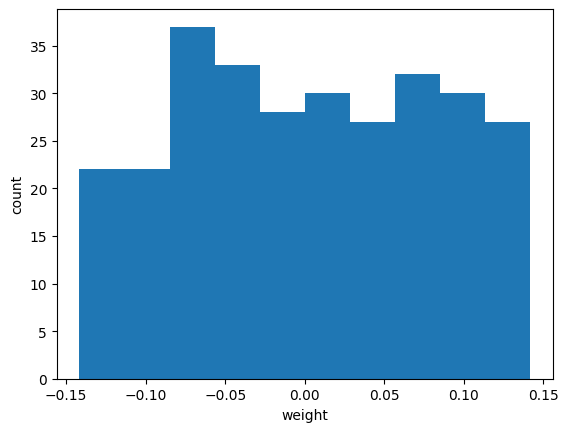

In [22]:
# 이 가중치 배열을 히스토그램으로 출력
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 대부분 가중치가 -0.15 ~ 0.15 사이에 있음
# 비교적 고른 분포를 보임
# (텐서플로가 신경망의 가중치를 처음 초기화할때 균등하게 분포에서 랜덤하게 값을 선택함)

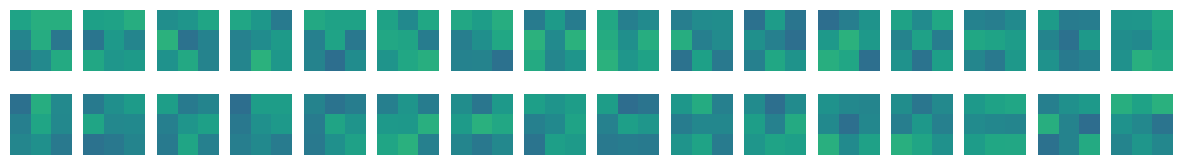

In [23]:
# imshow() 함수를 이용해서 그림으로 출력해 봄 -> 위방법과 동일 하게 설정
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()
# 가중치가 밋밋하게 표현됨 -> 이 그림을 위에 훈련된 이미지랑 비교해 보면
# 분류 정확도를 높이기 위해서 유용한 패턴을 학습했다는 사실이 나옴.

In [ ]:
# 함수형 API : 케라스의 내장형 함수
# 케라스의 Sequential 클래스는 층을 차례대로 쌓은 모델을 만듬
# 딥러닝에는 좀더 복잡한 모델이 많이 있다. (입력이 2개, 출력이 2개일 수도 있음)

# 이때 사용하는 것이 함수형 API이다.
# 함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만듬

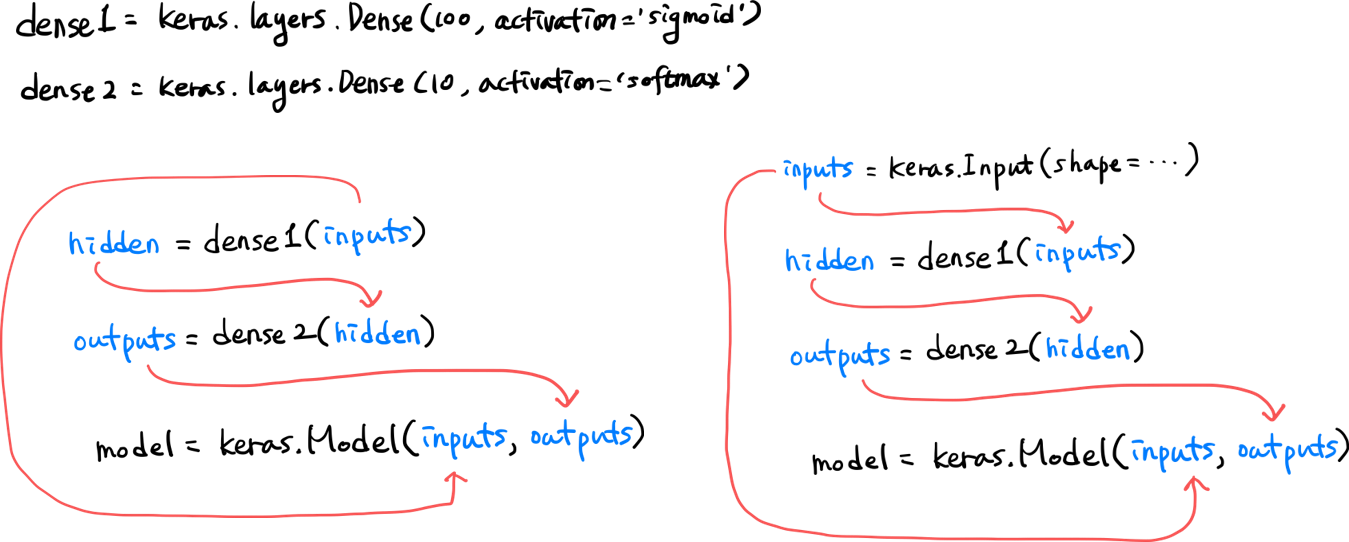

In [ ]:
# Dense 2개 완전 연결 신경망의 함수형 API
# keras.Model() 안쪽 파라미터로 제공
# 입력에서 출력까지 층을 호출한 결과를 계속 이어주고 Model 클래스에 입력과 최종 출력을 지정
# input=keras.input()은 plot_model() 함수로 모델의 층을 도식화 했을 때
# inputLayer 클래스가 처음 나온 것으로
# Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출해 줌

# Model 클래스에서는 우리가 수동으로 만들어서 호출 해야 함

# 전체를 합쳐보면 위 그림의 우측처럼 체인으로 동작함
# 입력에서 출력까지 연결하고 마지막에 Model 클래스에 입력과 출력을 지정하여 모델을 만듬
# 이렇게 모델을 만들게 되면 중간에 다양한 형태의 층을 연결할 수 있음
# inputs=keras.Input(shape=(784,))

# dense1 = keras.layers.Dense(100, activation='sigmoid')
# dense2 = keras.layers.Dense(10, activation='softmax')

# hidden = dense1(inputs)
# outputs = dense2(hidden)

# model = keras.Model(inputs, outputs)

In [ ]:
# model 객체의 층을 순서대로 나열

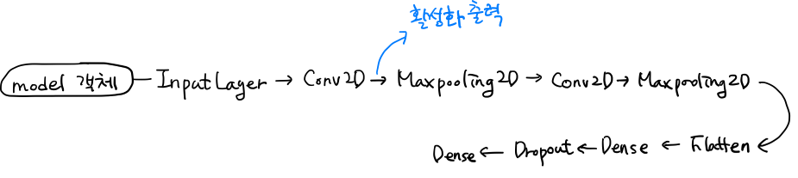

In [ ]:
# 우리가 2개 이상의 입력이 필요한 부분은 첫 번째 Conv2D의 출력 부분이다.
# model 객체의 입력과 Conv2D의 출력을 알 수 있다면 이둘을 연결하여
# 새로운 모델을 얻을 수 있을 것이다.

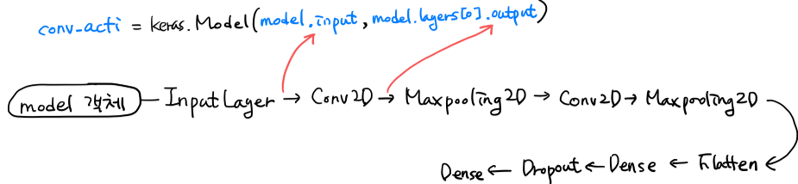

In [24]:
# model 객체를 predict() 메서드를 호출하면 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환한다.

# 하지만 우리가 필요한 것은 첫번째 Conv2D 층의 출력한 특성 맵임
# 첫 번째 층의 출력은 Conv2D 객체의 output 속성에서 얻을 수 있다.
#   ->  model.layer[0].output 을 참조한다.
# 입력은 model.inputs으로 얻을 수 있다.

print(model.inputs)
# []

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [31]:
# model.input 과 model.layers[0].output 을 연결하는 새로운 모델을 만들 수 있다
conv_acti = keras.Model(model.inputs, model.layers[0].output)

# model.predict(val_scaled[0:1]) 최종 출력층의 출력(확률)을 반환

# conv_acti.predict(inputs) 1번째 Conv2D의 출력을 반환

In [25]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


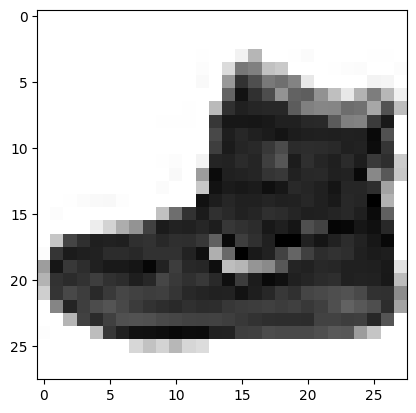

In [26]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [43]:
# 이샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해 보겠음
# predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대함
# 하나의 샘플을 전달하더라도 꼭 첫 번째 차원을 유지해야 함
# 이를 위해서 슬라이싱 연산자를 사용해 첫 번째 샘플을 선택 한다.
# 그 다음 (784,) 크기를 (28,28,1)로 변경하고 255로 나눔(전처리 과정 동일)
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs) # 특성맵의 출력이 만들어 짐.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [35]:
feature_maps.shape

(1, 28, 28, 32)

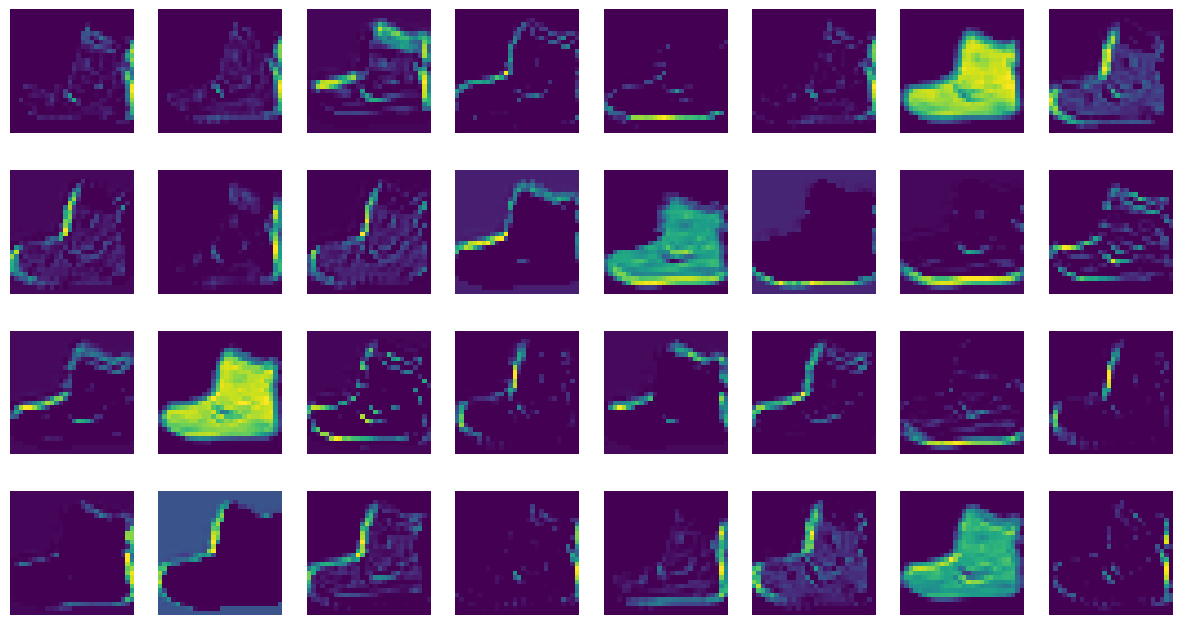

In [36]:
# 세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28,28,32)임
# 첫 번재 차원은 배치 차원이라는 점을 명심
# 샘플을 하나 입력했기 때문에 1이됨

# 맷플롯립 imshow()함수로 특성 맵을 그려보자 -> 총 32개의 특성 맵이 있으므로 4행으로 나누어 출력
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

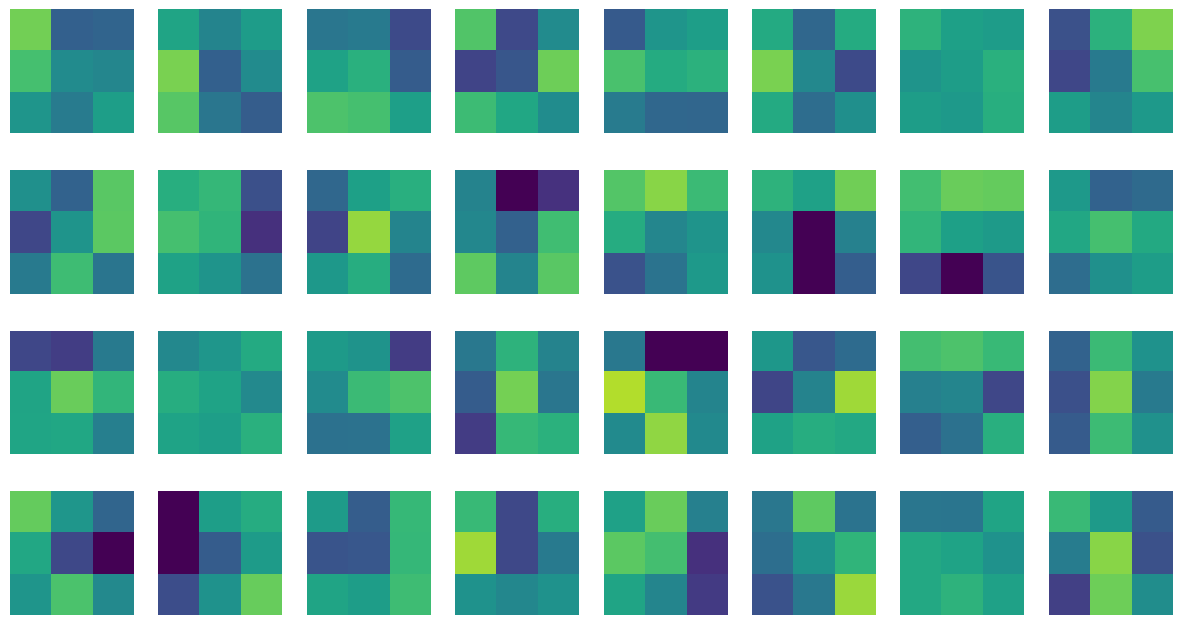

In [37]:
# 특성 맵과 비교를 해본다. (필터의 가중치를 출력한 그림과 1:1 비교)
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(conv_weights[:,:,0,i*8 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [38]:
# 두번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인

conv2_acti = keras.Model(model.inputs, model.layers[2].output)

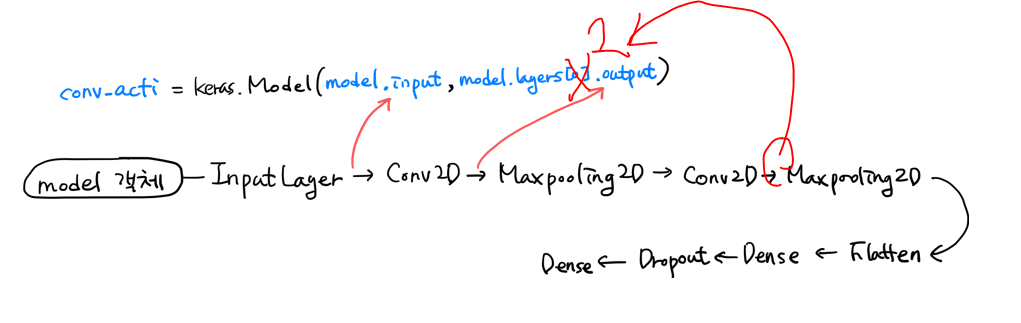

In [45]:
# 첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)
# 첫번째 풀링에서 가로세로 크기가 절반으로 줄였고, 두번째 합성곱 층의
# 필터 개수는 64개 이므로 feature_maps 의 크기는 배치 차원을 제외하면 (14,14,64)임

print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 14, 14, 64)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,000,580 (3.82 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 667,054 (2.54 MB)

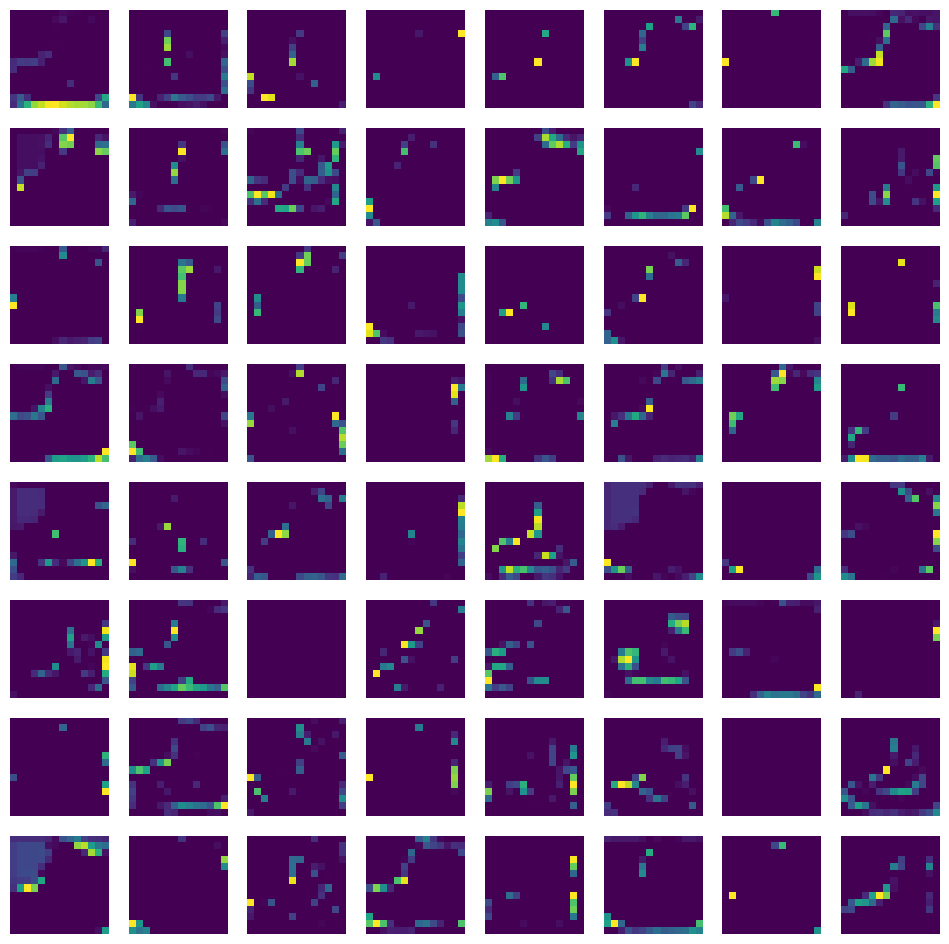

In [41]:
# 64개의 특성 맵을 8개씩 나누어 imshow()로 그려봄
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
# 이 특성 맵은 시각적으로 이해가 힘들군요
# 두번째 합성곱 층의 필터 크기는 (3,3,32)이고
# 두번째 합성곱 층의 첫번째 필터가 앞서 출력한 32개의 특성 맵과 곱해짐

# 두번째 합성곱 층의 첫 번째 특성 맵이 됨
# 이렇게 계산된 출력은 (14,14,32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기 힘들지만

# 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지를 시각적인 정보를 감지함
# 뒷부분은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 보면 됨
# 10개의 클래스를 찾을 수 있는 이유

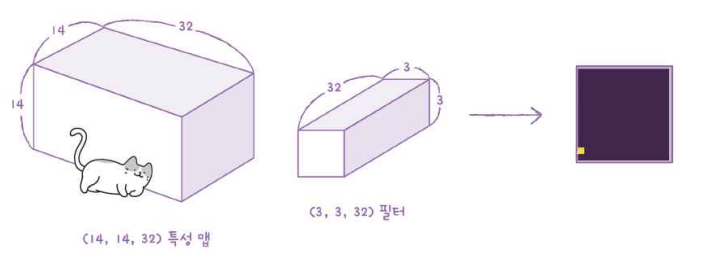